# Logistic Regression - No Balancing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
file = 'DataWithOutcomeEncoded.csv'
results_encoded_df = pd.read_csv(file)
results_encoded_df

,IP_Address,DateTime,Date,Time,Lat_Lng,Lat,Lng,gcl_wbr,bot_yn,Gbot_yn,UsrAgntSHORT,outcome
0,3499,2877,6,2265,3,0.000000,0.000000,4,1,1,12,0
1,3535,4076,8,2883,3,0.000000,0.000000,13,1,1,28,0
2,3532,3554,7,3576,3,0.000000,0.000000,13,1,1,28,1
3,3499,3268,6,7217,3,0.000000,0.000000,13,1,1,28,1
4,3528,1146,1,6982,3,0.000000,0.000000,13,1,1,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7870,722,1456,2,6880,127,28.538383,-81.378927,13,0,0,31,1
7871,83,2689,6,255,127,28.538383,-81.378927,4,0,0,45,0
7872,1398,911,1,3866,135,28.570294,-81.235361,13,0,0,31,1
7873,3278,2702,6,441,4,0.000000,0.000000,13,0,0,29,0


In [3]:
# Print the contents and counts of the "outcome" column
IP_Address_counts = results_encoded_df.IP_Address.value_counts()
print(IP_Address_counts)
print("")

DateTime_counts = results_encoded_df.DateTime.value_counts()
print(DateTime_counts)
print("")

Date_counts = results_encoded_df.Date.value_counts()
print(Date_counts)
print("")

Time_counts = results_encoded_df.Time.value_counts()
print(Time_counts)
print("")

Lat_Lng_counts = results_encoded_df.Lat_Lng.value_counts()
print(Lat_Lng_counts)
print("")

Lat_counts = results_encoded_df.Lat.value_counts()
print(Lat_counts)
print("")

Lng_counts = results_encoded_df.Lng.value_counts()
print(Lng_counts)
print("")

gcl_wbr_counts = results_encoded_df.gcl_wbr.value_counts()
print(gcl_wbr_counts)
print("")

bot_yn_counts = results_encoded_df.bot_yn.value_counts()
print(bot_yn_counts)
print("")

Gbot_yn_counts = results_encoded_df.Gbot_yn.value_counts()
print(Gbot_yn_counts)
print("")

UsrAgntSHORT_counts = results_encoded_df.UsrAgntSHORT.value_counts()
print(UsrAgntSHORT_counts)
print("")

outcome_counts = results_encoded_df.outcome.value_counts()
print(outcome_counts)

3671    62
3740    41
240     34
1437    29
3800    28
        ..
402      1
3681     1
406      1
410      1
2045     1
Name: IP_Address, Length: 4013, dtype: int64

2830    22
911     21
2325    21
12      20
3315    16
        ..
1413     1
3464     1
1417     1
3476     1
2047     1
Name: DateTime, Length: 4424, dtype: int64

0    1160
6    1144
7    1114
5    1004
1     977
8     973
4     856
2     514
3     133
Name: Date, dtype: int64

2361    4
904     4
2967    3
134     3
1378    3
       ..
5520    1
1418    1
5512    1
3459    1
2047    1
Name: Time, Length: 7324, dtype: int64

127    3475
3       502
4       203
131     126
135     121
       ... 
10        1
26        1
30        1
38        1
483       1
Name: Lat_Lng, Length: 487, dtype: int64

28.538383    3475
0.000000      705
28.557779     126
28.570294     121
28.329739     116
             ... 
44.623041       1
41.450084       1
52.520007       1
37.224236       1
51.403791       1
Name: Lat, Length: 486, dtype:

In [4]:
# Bar graph of outcome
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
outcome0 = results_encoded_df['outcome']=='0'
outcome0 = results_encoded_df[results_encoded_df['outcome']=='0']
outcome0 = outcome0['outcome'].count()

outcome1 = results_encoded_df['outcome']=='1'
outcome1 = results_encoded_df[results_encoded_df['outcome']=='1']
outcome1 = outcome1['outcome'].count()

outcome = {"outcome0": outcome0, "outcome1": outcome1}
category = list(outcome.keys())
count = list(outcome.values())
print(category)
print(count)

['outcome0', 'outcome1']
[0, 0]


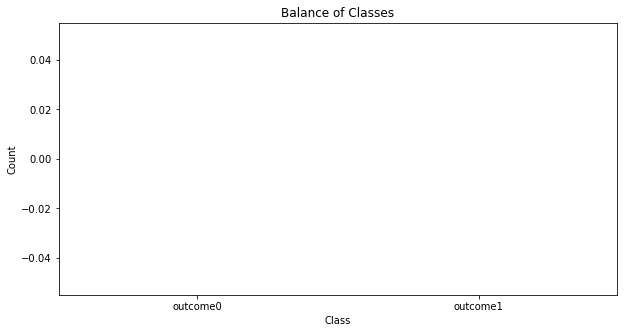

In [5]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(category, count, color = 'maroon')
 
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Balance of Classes")
plt.show()

In [6]:
results_encoded_df

,IP_Address,DateTime,Date,Time,Lat_Lng,Lat,Lng,gcl_wbr,bot_yn,Gbot_yn,UsrAgntSHORT,outcome
0,3499,2877,6,2265,3,0.000000,0.000000,4,1,1,12,0
1,3535,4076,8,2883,3,0.000000,0.000000,13,1,1,28,0
2,3532,3554,7,3576,3,0.000000,0.000000,13,1,1,28,1
3,3499,3268,6,7217,3,0.000000,0.000000,13,1,1,28,1
4,3528,1146,1,6982,3,0.000000,0.000000,13,1,1,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7870,722,1456,2,6880,127,28.538383,-81.378927,13,0,0,31,1
7871,83,2689,6,255,127,28.538383,-81.378927,4,0,0,45,0
7872,1398,911,1,3866,135,28.570294,-81.235361,13,0,0,31,1
7873,3278,2702,6,441,4,0.000000,0.000000,13,0,0,29,0


In [7]:
X = results_encoded_df.copy()
X = X.drop("outcome", axis=1)
X

,IP_Address,DateTime,Date,Time,Lat_Lng,Lat,Lng,gcl_wbr,bot_yn,Gbot_yn,UsrAgntSHORT
0,3499,2877,6,2265,3,0.000000,0.000000,4,1,1,12
1,3535,4076,8,2883,3,0.000000,0.000000,13,1,1,28
2,3532,3554,7,3576,3,0.000000,0.000000,13,1,1,28
3,3499,3268,6,7217,3,0.000000,0.000000,13,1,1,28
4,3528,1146,1,6982,3,0.000000,0.000000,13,1,1,28
...,...,...,...,...,...,...,...,...,...,...,...
7870,722,1456,2,6880,127,28.538383,-81.378927,13,0,0,31
7871,83,2689,6,255,127,28.538383,-81.378927,4,0,0,45
7872,1398,911,1,3866,135,28.570294,-81.235361,13,0,0,31
7873,3278,2702,6,441,4,0.000000,0.000000,13,0,0,29


In [8]:
y = results_encoded_df["outcome"].values
y

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1111)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5906, 11)
(1969, 11)
(5906,)
(1969,)


#  Logistic Regression Model

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
# Create Model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1111, stratify=y)

classifier = LogisticRegression(solver='lbfgs', random_state=1111)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=1000,
                   multi_class='warn', penalty='12', random_state=1111, solver='lbfgs', tol=0.0001, warm_start=False)

LogisticRegression(max_iter=1000, multi_class='warn', penalty='12',
                   random_state=1111)

In [12]:
# Train Model
classifier.fit(X_train,y_train)
print("model score: %.3f" % classifier.score(X_test, y_test))

model score: 0.939


C:\Users\lkwor\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [13]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
1964,1,1
1965,0,0
1966,0,0
1967,0,0


In [14]:
# Confusion Matrix

cm = confusion_matrix(y_test, predictions)
cm_df=pd.DataFrame(cm)
cm_df=pd.DataFrame(
    cm, index=["Actual Outcome0", "Actual Outcome1"], columns=["Predicted Outcome0", "Predicted Outcome1"])
cm_df

,Predicted Outcome0,Predicted Outcome1
Actual Outcome0,916,77
Actual Outcome1,43,933


In [15]:
# Compute Accuracy Score
accuracy_score(y_test, predictions)

0.9390553580497715

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       993
           1       0.92      0.96      0.94       976

    accuracy                           0.94      1969
   macro avg       0.94      0.94      0.94      1969
weighted avg       0.94      0.94      0.94      1969

